<a href="https://colab.research.google.com/github/AndreiaMatias/AndreiaMatias/blob/main/An%C3%A1lise_exploratoria_CRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from matplotlib.ticker import PercentFormatter

# Base CRM

Lendo a base

In [ ]:
crm = pd.read_excel("/content/drive/MyDrive/Acelera/Arquivos - Marketing e Vendas/Base_CRM.xlsx", sheet_name="Base CRM")

In [ ]:
crm.head()

,ID_Lead,Vendedor que atendeu,Data do Lead,Data da Conversão,Conversão,Receita,Data da Perda,Motivo da Perda
0,1500,Vendedor E,2022-09-01,2022-09-08,1,13459.5,NaT,NaN
1,1501,Vendedor D,2022-09-01,2022-09-01,1,14955.0,NaT,NaN
2,1502,Vendedor D,2022-09-02,2022-09-02,1,14955.0,NaT,NaN
3,1503,Vendedor A,2022-09-03,2022-09-03,1,14955.0,NaT,NaN
4,1504,Vendedor B,2022-09-03,NaT,0,20205.0,2022-11-09,Outros


In [ ]:
crm['Vendedor que atendeu'] = crm['Vendedor que atendeu'].map(lambda x: x.split(' ')[1])

In [ ]:
crm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158 entries, 0 to 2157
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID_Lead               2158 non-null   int64         
 1   Vendedor que atendeu  2158 non-null   object        
 2   Data do Lead          2158 non-null   datetime64[ns]
 3   Data da Conversão     499 non-null    datetime64[ns]
 4   Conversão             2158 non-null   int64         
 5   Receita               2158 non-null   float64       
 6   Data da Perda         1659 non-null   datetime64[ns]
 7   Motivo da Perda       1659 non-null   object        
dtypes: datetime64[ns](3), float64(1), int64(2), object(2)
memory usage: 135.0+ KB


In [ ]:
crm['Qtde dias conversão'] = (crm['Data da Conversão'] - crm['Data do Lead']).dt.days

In [ ]:
crm['Qtde dias perda'] = (crm['Data da Perda'] - crm['Data do Lead']).dt.days

In [ ]:
crm['ID_Lead'] = crm['ID_Lead'].astype('object')

In [ ]:
crm['Conversão'] = crm['Conversão'].astype('object')

In [ ]:
crm.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Receita,2158.0,20181.11,1914.30,2245.5,20205.0,20205.0,20205.0,34455.0
Qtde dias conversão,499.0,9.07,19.52,0.0,0.0,1.0,8.0,135.0
Qtde dias perda,1659.0,13.26,21.03,0.0,6.0,7.0,11.0,200.0


In [ ]:
crm['Receita'].sum()

43550843.849999994

In [ ]:
crm['Vendedor que atendeu'].unique()

array(['E', 'D', 'A', 'B', 'C'], dtype=object)

In [ ]:
crm['Data do Lead'].min()

Timestamp('2022-09-01 00:00:00')

In [ ]:
crm['Data do Lead'].max()

Timestamp('2023-02-28 00:00:00')

In [ ]:
crm['Data da Conversão'].min()

Timestamp('2022-09-01 00:00:00')

In [ ]:
crm['Data da Conversão'].max()

Timestamp('2023-03-31 00:00:00')

In [ ]:
crm.loc[crm['Conversão'] == 1, 'Conversões'] = 'Sim'

In [ ]:
crm.loc[crm['Conversão'] == 0, 'Conversões'] = 'Não'

In [ ]:
freq_abs = pd.DataFrame(crm['Conversões'].value_counts())
freq_rel = pd.DataFrame(crm['Conversões'].value_counts(1)*100)
freq_conversao = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_conversao.columns = ['Conversões', 'Qtde', '%']
freq_conversao




,Conversões,Qtde,%
0,Não,1659,76.876738
1,Sim,499,23.123262


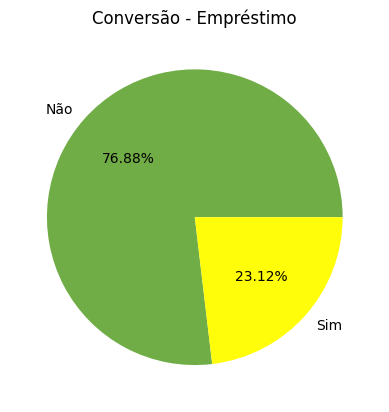

In [ ]:
colors=["#70AD46", "#FFFD09", "#8C8C8C", "#F2E205"]
plt.pie(freq_conversao['%'], labels = freq_conversao['Conversões'], autopct='%.2f%%', colors=colors)
plt.title("Conversão - Empréstimo")
plt.show()

In [ ]:
freq_abs = pd.DataFrame(crm['Motivo da Perda'].value_counts())
freq_rel = pd.DataFrame(crm['Motivo da Perda'].value_counts(1)*100)
freq_motivo_perda = freq_abs.merge(freq_rel, how='left', left_index=True, right_index=True).reset_index()
freq_motivo_perda.columns = ['Motivo da Perda', 'Qtde', '%']
freq_motivo_perda.round({'%': 2})



,Motivo da Perda,Qtde,%
0,Não retornou contato,1304,78.60
1,Preço alto,136,8.20
2,Vai deixar para outro momento,90,5.42
3,Não tem interesse,81,4.88
4,Outros,38,2.29
5,Vai fechar com a concorrência,10,0.60


In [ ]:
freq_motivo_perda['% acumulado'] = freq_motivo_perda['Qtde'].cumsum()/freq_motivo_perda['Qtde'].sum()*100
freq_motivo_perda.round({'%': 2,	'% acumulado': 2})

,Motivo da Perda,Qtde,%,% acumulado
0,Não retornou contato,1304,78.60,78.60
1,Preço alto,136,8.20,86.80
2,Vai deixar para outro momento,90,5.42,92.22
3,Não tem interesse,81,4.88,97.11
4,Outros,38,2.29,99.40
5,Vai fechar com a concorrência,10,0.60,100.00


<ipython-input-23-8aa94342c3b4>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


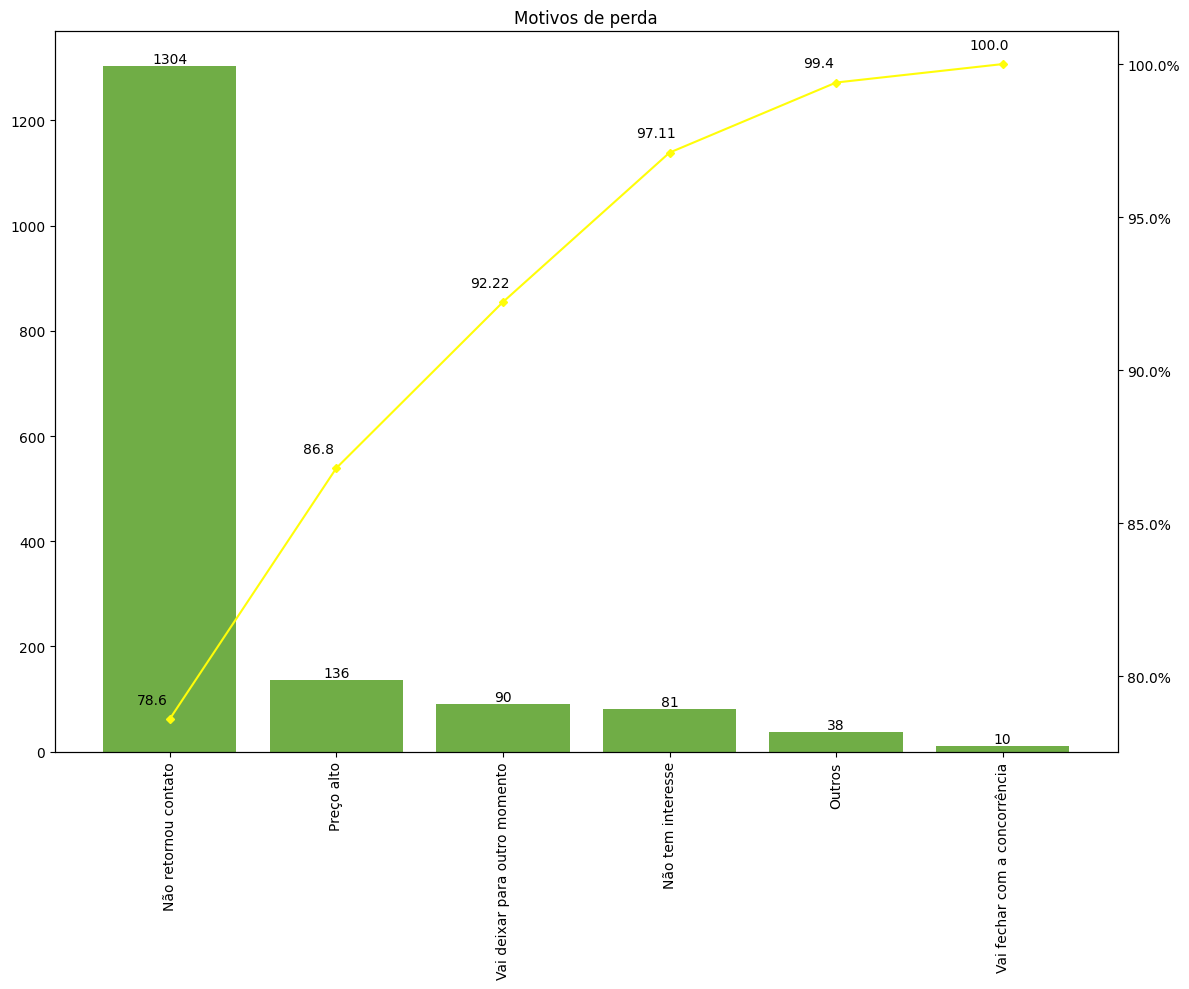

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.bar(freq_motivo_perda['Motivo da Perda'], freq_motivo_perda['Qtde'], color=colors[0])
ax.bar_label(ax.containers[0])

ax2 = ax.twinx()
ax2.plot(freq_motivo_perda['Motivo da Perda'], freq_motivo_perda['% acumulado'], color=colors[1], marker="D", ms=4)
for x_val, y_val in zip (range(len(freq_motivo_perda)), freq_motivo_perda['% acumulado'].round(2)):
    ax2.text(
        x=x_val-0.2,
        y=y_val+0.5,
        s=y_val, 
    )
ax2.yaxis.set_major_formatter(PercentFormatter())


plt.title("Motivos de perda")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show();

<Axes: xlabel='Receita'>

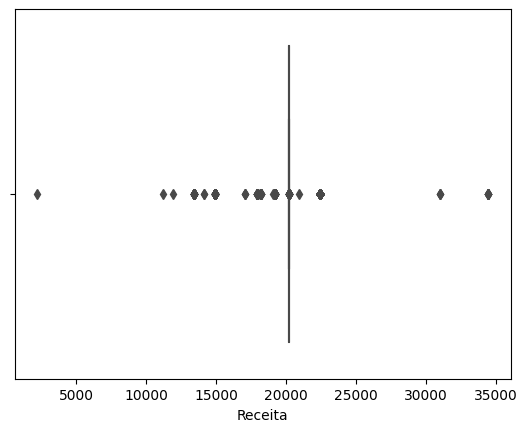

In [ ]:
sns.boxplot(x=crm["Receita"], palette = colors)

Análise bivariada

In [ ]:
leads_vendedor = pd.DataFrame(crm['Vendedor que atendeu'].value_counts().reset_index())
leads_vendedor.columns = ['Vendedor', 'Qtde leads']
perc_leads_vendedor = pd.DataFrame(crm['Vendedor que atendeu'].value_counts(1)*100).reset_index()
perc_leads_vendedor.columns = ['Vendedor', '% leads']
lead_v = leads_vendedor.merge(perc_leads_vendedor, how='left')
lead_v.round({'% leads': 2})

,Vendedor,Qtde leads,% leads
0,A,460,21.32
1,D,441,20.44
2,E,428,19.83
3,C,422,19.56
4,B,407,18.86


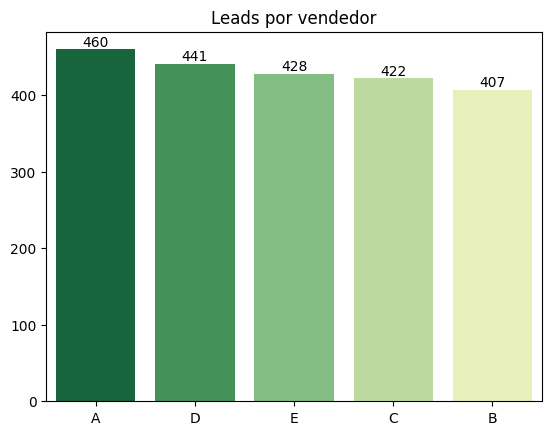

In [ ]:
ax = sns.countplot(x = crm['Vendedor que atendeu'], palette='YlGn_r', order = crm['Vendedor que atendeu'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Leads por vendedor")
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
conversoes_vendedor = pd.DataFrame(crm[crm['Conversões'] == "Sim"]['Vendedor que atendeu'].value_counts().reset_index())
conversoes_vendedor.columns = leads_vendedor.columns = ['Vendedor', 'Qtde conversões']
perc_conversoes_vendedor = pd.DataFrame((crm[crm['Conversões'] == "Sim"]['Vendedor que atendeu'].value_counts(1)*100).reset_index())
perc_conversoes_vendedor.columns = leads_vendedor.columns = ['Vendedor', '% conversões']
conversoes_v = conversoes_vendedor.merge(perc_conversoes_vendedor, how='left')
conversoes_v.round({'% conversões': 2})


,Vendedor,Qtde conversões,% conversões
0,A,104,20.84
1,B,104,20.84
2,E,103,20.64
3,D,95,19.04
4,C,93,18.64


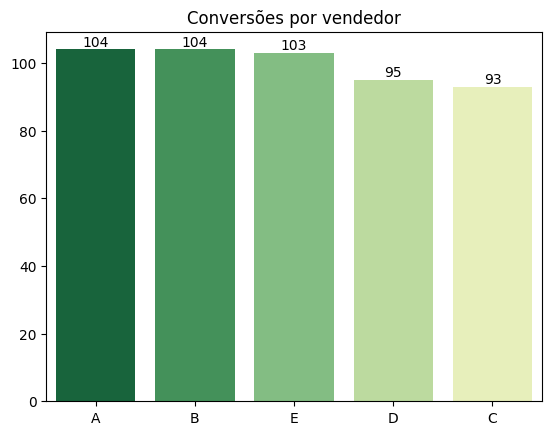

In [ ]:
ax = sns.countplot(x = crm[crm['Conversões'] == "Sim"]['Vendedor que atendeu'], palette='YlGn_r', order = crm[crm['Conversões'] == "Sim"]['Vendedor que atendeu'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Conversões por vendedor")
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show()

In [ ]:
lead_conv = lead_v.merge(conversoes_v, how='left')

In [ ]:
lead_conv['conv/leads'] = lead_conv['Qtde conversões']/lead_conv['Qtde leads']*100

In [ ]:
lead_conv.round({'% leads': 2, '% conversões': 2, 'conv/leads': 2})

,Vendedor,Qtde leads,% leads,Qtde conversões,% conversões,conv/leads
0,A,460,21.32,104,20.84,22.61
1,D,441,20.44,95,19.04,21.54
2,E,428,19.83,103,20.64,24.07
3,C,422,19.56,93,18.64,22.04
4,B,407,18.86,104,20.84,25.55


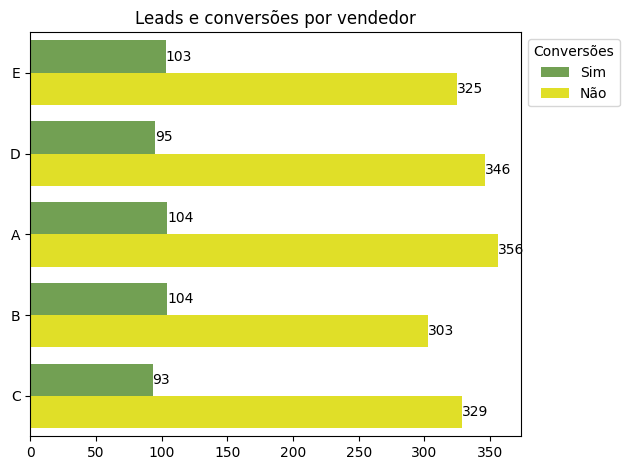

In [ ]:
ax = sns.countplot(data=crm, y='Vendedor que atendeu', hue='Conversões', palette=colors)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Leads e conversões por vendedor")
ax.set(xlabel=None)
ax.set(ylabel=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [ ]:
crm[crm['Conversões']=='Sim']['Receita'].sum().round(2)

9735383.85

In [ ]:
(crm[crm['Conversões']=='Sim']['Receita'].sum()/crm['Receita'].sum()*100).round(2)

22.35

In [ ]:
receita_vendedor = crm['Receita'].groupby(crm['Vendedor que atendeu']).sum().reset_index()
receita_vendedor.columns = ['Vendedor','Receita projetada']
receita_vendedor_perc = (crm['Receita'].groupby(crm['Vendedor que atendeu']).sum()/crm['Receita'].sum()*100).reset_index().round(2)
receita_vendedor_perc.columns = ['Vendedor', '% receita projetada']
receita_vendedor_conv = crm[crm['Conversões']=='Sim']['Receita'].groupby(crm['Vendedor que atendeu']).sum().reset_index()
receita_vendedor_conv.columns = ['Vendedor','Receita realizada']
receita_vendedor_conv_perc = (crm[crm['Conversões']=='Sim']['Receita'].groupby(crm['Vendedor que atendeu']).sum()/crm[crm['Conversões']=='Sim']['Receita'].sum()*100).reset_index().round(2)
receita_vendedor_conv_perc.columns = ['Vendedor','% receita realizada']
receita_realizada_projetada_vendedor = pd.merge(pd.merge(pd.merge(receita_vendedor, receita_vendedor_perc, on = 'Vendedor'), receita_vendedor_conv, on = 'Vendedor'), receita_vendedor_conv_perc, on = 'Vendedor').round(2)
receita_realizada_projetada_vendedor['realizada/projetada'] = (receita_realizada_projetada_vendedor['Receita realizada']/receita_realizada_projetada_vendedor['Receita projetada']*100).round(2)
receita_realizada_projetada_vendedor

,Vendedor,Receita projetada,% receita projetada,Receita realizada,% receita realizada,realizada/projetada
0,A,9269181.90,21.28,2023026.90,20.78,21.83
1,B,8285038.65,19.02,2068453.65,21.25,24.97
2,C,8516622.30,19.56,1797927.30,18.47,21.11
3,D,8902353.00,20.44,1880748.00,19.32,21.13
4,E,8577648.00,19.70,1965228.00,20.19,22.91


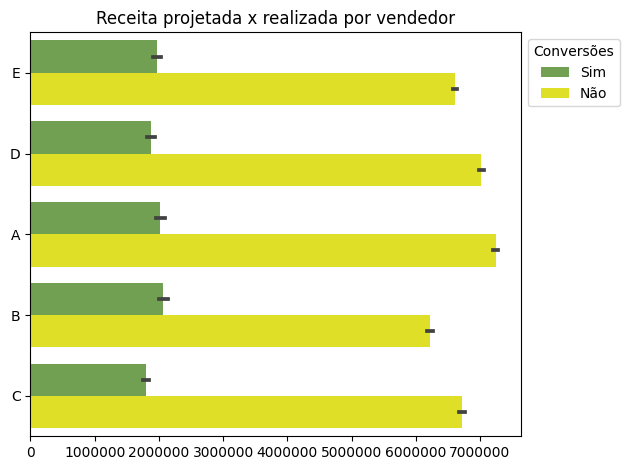

In [ ]:
ax = sns.barplot(data=crm, x='Receita', y='Vendedor que atendeu', estimator=sum, hue='Conversões', palette= colors)
#ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.ticklabel_format(style='plain', axis='x')
plt.title("Receita projetada x realizada por vendedor")
ax.set(xlabel=None)
ax.set(ylabel=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


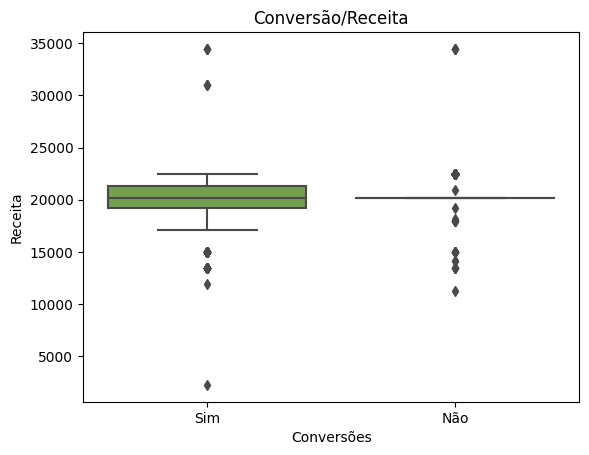

In [ ]:
sns.boxplot(data=crm, x="Conversões", y="Receita", palette = colors)
plt.title("Conversão/Receita")
plt.show()

In [ ]:
crm['Mês da conversão'] = crm['Data da Conversão'].dt.to_period('M')

In [ ]:
crm['Mês do lead'] = crm['Data do Lead'].dt.to_period('M')

In [ ]:
quant_leads = pd.DataFrame(crm.groupby('Mês do lead')['Receita'].count().reset_index())
quant_leads.columns= ['mês do lead', 'Qtde leads']
perc_leads = pd.DataFrame(crm.groupby('Mês do lead')['Receita'].count()/crm['Receita'].count()*100).reset_index()
perc_leads.columns = ['mês do lead', '% leads']
leads = quant_leads.merge(perc_leads, how='left')
leads = leads.round({'% leads': 2})
leads

,mês do lead,Qtde leads,% leads
0,2022-09,91,4.22
1,2022-10,180,8.34
2,2022-11,414,19.18
3,2022-12,395,18.30
4,2023-01,585,27.11
5,2023-02,493,22.85


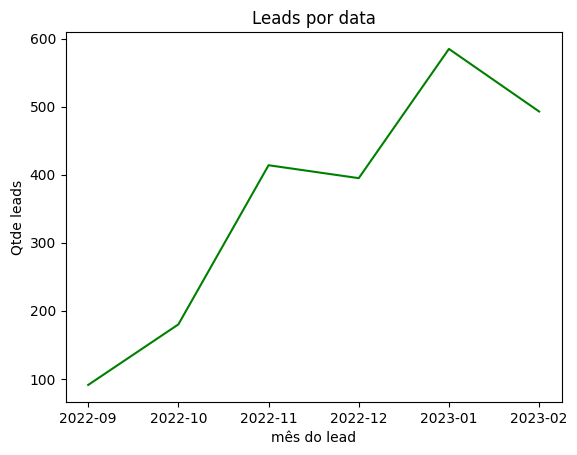

In [ ]:
sns.lineplot(data=quant_leads, x=quant_leads["mês do lead"].astype(str), y="Qtde leads", color="green");
plt.title("Leads por data");
plt.show();

In [ ]:
quant_conversoes = pd.DataFrame(crm[crm['Conversões']=='Sim'].groupby('Mês do lead')['Receita'].count().reset_index())
quant_conversoes.columns= ['mês do lead', 'Qtde conversões']
perc_conversoes = pd.DataFrame(crm[crm['Conversões']=='Sim'].groupby('Mês do lead')['Receita'].count()/crm[crm['Conversões']=='Sim']['Receita'].count()*100).reset_index()
perc_conversoes.columns = ['mês do lead', '% conversões']
conversoes = quant_conversoes.merge(perc_conversoes, how='left')
conversoes = conversoes.round({'% conversões': 2})
conversoes

,mês do lead,Qtde conversões,% conversões
0,2022-09,70,14.03
1,2022-10,72,14.43
2,2022-11,150,30.06
3,2022-12,56,11.22
4,2023-01,80,16.03
5,2023-02,71,14.23


In [ ]:
leads_conversoes = leads.merge(conversoes, how='left')
leads_conversoes['conversão/leads'] = (leads_conversoes['Qtde conversões']/leads_conversoes['Qtde leads']*100).round(2)
leads_conversoes

,mês do lead,Qtde leads,% leads,Qtde conversões,% conversões,conversão/leads
0,2022-09,91,4.22,70,14.03,76.92
1,2022-10,180,8.34,72,14.43,40.00
2,2022-11,414,19.18,150,30.06,36.23
3,2022-12,395,18.30,56,11.22,14.18
4,2023-01,585,27.11,80,16.03,13.68
5,2023-02,493,22.85,71,14.23,14.40


In [ ]:
lead_plot = leads_conversoes[['mês do lead', '% leads', '% conversões','conversão/leads']]
lead_plot = lead_plot.melt(id_vars='mês do lead', 
        var_name="Indicador", 
        value_name="%")


<ipython-input-47-4dc0a9427a16>:1: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(data=lead_plot, x=lead_plot['mês do lead'].astype(str), y='%', hue='Indicador', palette=colors);


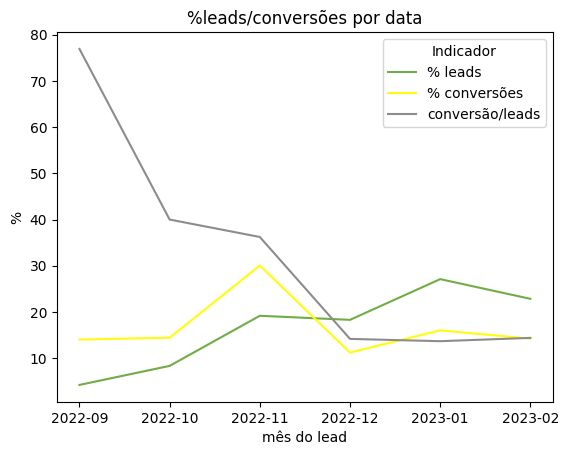

In [ ]:
sns.lineplot(data=lead_plot, x=lead_plot['mês do lead'].astype(str), y='%', hue='Indicador', palette=colors);
plt.title("%leads/conversões por data");
plt.show();

In [ ]:

receita = pd.DataFrame(crm['Receita'].groupby(crm['Data do Lead'].dt.to_period("M")).sum().reset_index())
receita.columns = ['mês do lead', 'Receita projetada']
perc_receita = pd.DataFrame(crm['Receita'].groupby(crm['Data do Lead'].dt.to_period("M")).sum()/crm['Receita'].sum()*100).reset_index()
perc_receita.columns = ['mês do lead', '% Receita projetada']
lead_receita = receita.merge(perc_receita, how='left')
lead_receita = lead_receita.round({'% Receita projetada': 2})
receita = pd.DataFrame(crm[crm['Conversões']=='Sim'].groupby('Mês do lead')['Receita'].sum().reset_index())
receita.columns = ['mês do lead', 'Receita realizada']
perc_receita = pd.DataFrame(crm[crm['Conversões']=='Sim'].groupby('Mês do lead')['Receita'].sum()/crm[crm['Conversões']=='Sim']['Receita'].sum()*100).reset_index()
perc_receita.columns = ['mês do lead', '% Receita realizada']
conversao_data = receita.merge(perc_receita, how='left')
conversao_data = conversao_data.round({'% Receita realizada': 2})
receita_projetada_realizada = lead_receita.merge(conversao_data, how='left')
receita_projetada_realizada['Realizada/projetada'] = (receita_projetada_realizada['Receita realizada']/receita_projetada_realizada['Receita projetada']*100).round(2)
receita_projetada_realizada

,mês do lead,Receita projetada,% Receita projetada,Receita realizada,% Receita realizada,Realizada/projetada
0,2022-09,1391536.35,3.20,1023481.35,10.51,73.55
1,2022-10,3437192.25,7.89,1271012.25,13.06,36.98
2,2022-11,8352742.05,19.18,3017722.05,31.00,36.13
3,2022-12,8021398.20,18.42,1159978.20,11.92,14.46
4,2023-01,11920950.00,27.37,1701675.00,17.48,14.27
5,2023-02,10427025.00,23.94,1561515.00,16.04,14.98


In [ ]:
receita_plot = receita_projetada_realizada[['mês do lead','% Receita projetada', '% Receita realizada', 'Realizada/projetada']]
receita_plot = receita_plot.melt(id_vars='mês do lead', 
        var_name="Indicador", 
        value_name="%")
receita_plot

,mês do lead,Indicador,%
0,2022-09,% Receita projetada,3.20
1,2022-10,% Receita projetada,7.89
2,2022-11,% Receita projetada,19.18
3,2022-12,% Receita projetada,18.42
4,2023-01,% Receita projetada,27.37
5,2023-02,% Receita projetada,23.94
6,2022-09,% Receita realizada,10.51
7,2022-10,% Receita realizada,13.06
8,2022-11,% Receita realizada,31.00
9,2022-12,% Receita realizada,11.92


<ipython-input-50-cef1c59ec747>:1: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(data=receita_plot, x=receita_plot["mês do lead"].astype(str), y="%", hue="Indicador", palette=colors);


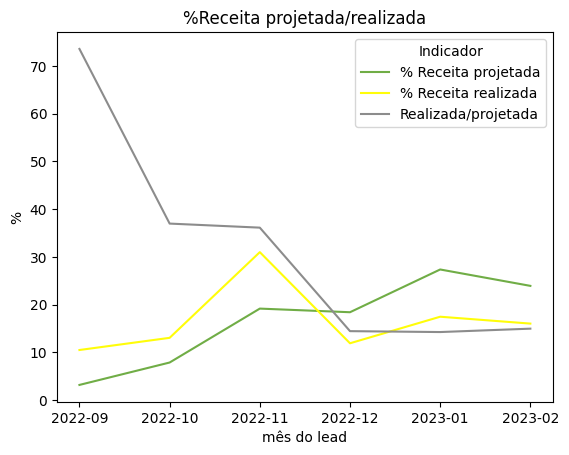

In [ ]:
sns.lineplot(data=receita_plot, x=receita_plot["mês do lead"].astype(str), y="%", hue="Indicador", palette=colors);
plt.ticklabel_format(style='plain', axis='y');
plt.title("%Receita projetada/realizada");
plt.show();

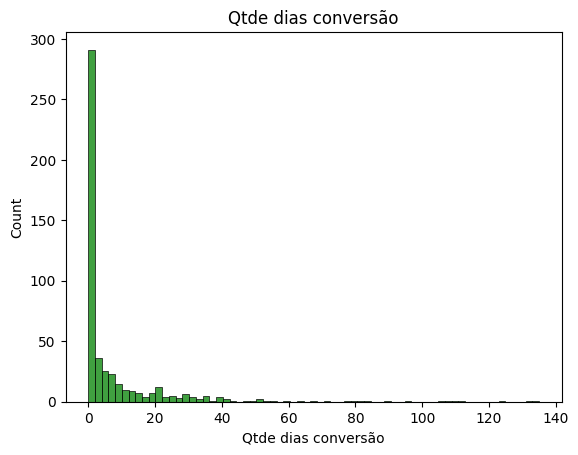

In [ ]:
sns.histplot(data=crm, x="Qtde dias conversão", color="green")
plt.title("Qtde dias conversão")
plt.show()

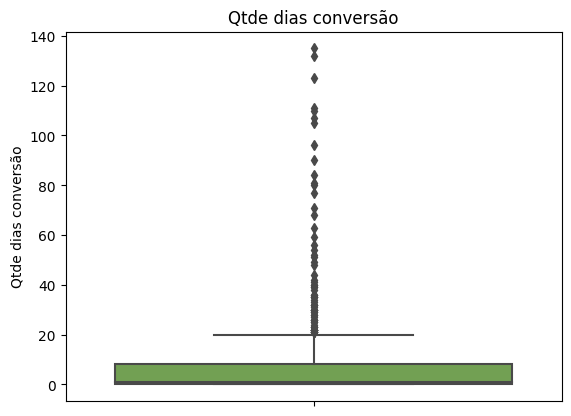

In [ ]:
sns.boxplot(data=crm, y="Qtde dias conversão", palette = colors)
plt.title("Qtde dias conversão")
plt.show()

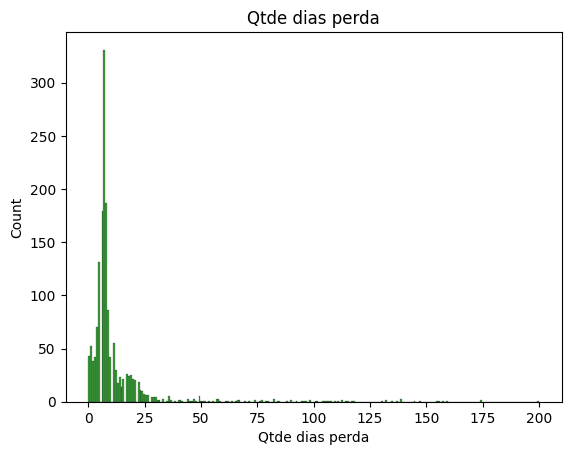

In [ ]:
sns.histplot(data=crm, x="Qtde dias perda", color="green")
plt.title("Qtde dias perda")
plt.show()

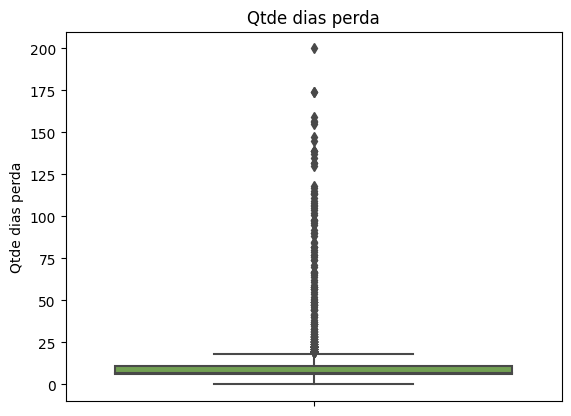

In [ ]:
sns.boxplot(data=crm, y="Qtde dias perda", palette = colors)
plt.title("Qtde dias perda")
plt.show()

In [ ]:
crm.to_excel("/content/drive/MyDrive/Acelera/Bases tratadas/base_crm_tratada.xlsx", index = False)